# Финальный проект модуля Python
#  «Анализ данных об оптовых продажах аудиотехники»

**В финальном проекте модуля Python вам предстоит поработать аналитиком данных в компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.** 

«Карпов Саунд» сотрудничает с крупными розничными сетями и специализированными магазинами аудиотехники в России. Клиенты компании регулярно оставляют заявки на закупку товаров в CRM системе, менеджеры связываются с клиентами, обсуждают детали, после чего заказы либо подтверждаются менеджерами, либо по разным причинам отменяются. 

В «Карпов Саунд» трепетно относятся к хранению информации о своих товарах, клиентах и заказах, однако в самый неподходящий момент хранилище данных компании оказалось временно недоступно из-за плановых работ по его оптимизации. Поэтому в рамках этого проекта все данные будут представлены не в самом удобном для анализа виде — в формате резервной выгрузки, разложенной по разным папкам на сервере компании.

Вам необходимо собрать данные из разрозненных источников, проанализировать их и сделать выводы, которые помогут руководству компании принять верные тактические решения.

**В ходе работы над проектом вам встретятся следующие таблицы:**  

1) orders (данные о заказах):  
- order_id — номер заказа  
- product_id — идентификатор товара  
- quantity — количество этого товара в заказе

2) order_status (данные о статусах заказов и клиентах):
- order_id — номер заказа  
- client_id — идентификатор клиента  
- status — статус заказа

3) products (данные о товарах):
- id — идентификатор товара  
- name — имя товара (сначала указан бренд, через запятую модель товара)  
- price — цена единицы товара, в долларах

Каждый заказ имеет статус или подтвержденного (`confirmed`), или отмененного (`canceled`). В одном заказе может быть несколько разных товаров. Если заказ был отменен, а потом создан такой же (тем же клиентом, с теми же товарами, у того же менеджера), в базе останется запись о двух заказах с разными номерами и статусами, поскольку система не позволяет создать заказ с тем же номером.

Сначала вам нужно собрать и предобработать три типа датасетов: `orders.csv`, `order_status.csv`, `products.csv`.

На схеме показано, как связаны таблицы между собой:

![](https://storage.yandexcloud.net/klms-public/production/learning-content/457/4167/37264/104636/497986/er_white.png)

Данные находятся в папке `data` из директории `shared` (`shared` -> `homeworks` -> `python_ds_miniprojects` -> `final_project`). Внутри папки `data` находятся 2 другие папки: `orders` и `products`.

В папке `orders` папки с датами, в которые сделаны записи. В этих папках — папки с именами менеджеров по продажам. Эти папки содержат файлы `orders.csv` и `order_status.csv` (в каждой папке по одной паре файлов). Пример структуры: `data` -> `orders` -> `2024-03-01` -> `Алексей Саксофонов` -> `orders.csv` и `order_status.csv`.

В папке `products` папки с категориями товаров. В этих папках файлы `products.csv` (в каждой папке по одному файлу). Пример структуры: `data` -> `products` -> `AV-процессор` -> `products.csv`.

Кроме того у вас есть файл `usd_rate.txt` с курсом доллара США на каждый день анализируемого периода (данные в формате `дата,курс,валюта`). Он потребуется в середине проекта.

В финальном проекте модуля вы можете пользоваться подсказками в ноутбуке (они менее подробные, чем были в предыдущих уроках), обращаться за помощью к экспертам в Discord и смотреть разборы в LMS (за просмотр разбора снимается половина баллов за задание).

### Соберем датасет с заказами по папкам

## Шаг 2

**Ваша первая задача — собрать данные со всех папок в три датафрейма:**  
1. `df_orders` — на основе датасетов `orders.csv` + добавьте колонку `manager` с именами менеджеров и колонку `date` с датами. 
2. `df_order_status` — на основе датасетов `order_status.csv`.  
3. `df_products` — на основе датасетов `products.csv` + добавьте колонку `category` с категориями товаров.  

**Соберите датафреймы и сохраните их в соответствующие csv файлы: `df_orders.csv`, `df_order_status.csv` и `df_products.csv`. Отправьте файлы на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеки `pandas` и `os`.  
      
2) По аналогии с кодом, который вы использовали для сбора данных в 7-м уроке про грязные данные, сделайте следующее:  
a. создайте путь к папке `data`, используя ваш логин;  
b. соберите названия нужных вам файлов (`orders.csv`, `order_status.csv`, `products.csv`) в список `target_files`;  
c. создайте пустой список `data_files`, куда будете сохранять пути к файлам;  
d. с помощью функции `os.walk()` создайте генератор;  
e. с помощью цикла пройдитесь по генератору и, если название файла совпадает с нужным вам из списка `target_files`, путь к этому файлу добавьте в список `data_files`.
      
3) Используя пути к файлам из списка `data_files`, соберите полные датафреймы `df_orders`, `df_order_status` и `df_products`:  
a. создайте пустые списки `orders_df_list`, `order_status_df_list` и `products_df_list`, чтобы в них сложить данные для соответствующих датафреймов;  
b. с помощью цикла пройдитесь по путям в списке `data_files` и прочитайте датафрейм по этому пути. Добавьте датафрейм в тот или иной список в зависимости от того, название какого датасета содержит путь. Если в названии пути есть `orders.csv`, перед добавлением в список создайте колонки `manager` с именами менеджеров и `date` с датами. А если в названии пути есть `products.csv`, перед добавлением в список создайте колонку `category` с категориями товаров. Для создания колонок используйте подстроки из строки с путем.  
      
4) Каждый раз используя функцию `pd.concat` с параметром `ignore_index=True`, соберите данные в датафреймы: из списка `orders_df_list` в датафрейм `df_orders`, из списка `order_status_df_list` — в датафрейм `df_order_status`, а из списка `products_df_list` - в датафрейм `df_products`.
      
5) Проверьте размер каждого датафрейма и убедитесь, что:
- `df_orders` имеет размер (4603, 5)
- `df_order_status` — (346, 3)
- `df_products` — (1677, 4)
      
6) Сохраните каждый датафрейм в соответствующий csv файл, задав его название как строку и параметр `index=False`.
      
7) По одному скачайте получившиеся csv файлы из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код.

      
</p>
</details>

In [167]:
import pandas as pd
import os as os

target_files = ['orders.csv', 'order_status.csv', 'products.csv']
data_files = []
way = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/"
way

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/'

In [168]:
for item in os.walk(way):
    files = item[-1]
    if len(files) > 0:
        for target_file in target_files:
            if target_file in files:
                path = os.path.join(item[0], target_file) 
                data_files.append(path)
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/Настенная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/Система караоке/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/Напольная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/Полочная акустика/products.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-nizam-kurbanaliev--cacdb/shared/homeworks/python_ds_miniprojects/final_project/data/products/Са

In [169]:
orders_df_list = []
order_status_df_list = []
products_df_list = []
for path in data_files:
    df = pd.read_csv(path)
    if 'orders.csv' in path:
        date, manager = path.split('/')[11:13]
        df['manager'] = manager
        df['date'] = date
        orders_df_list.append(df)
    if 'order_status.csv' in path:
        order_status_df_list.append(df)
    if 'products.csv' in path:
        category = path.split('/')[-2]
        df['category'] = category
        products_df_list.append(df)

In [170]:
orders_df_list = []
order_status_df_list = []
products_df_list = []

for i in data_files:
    data = pd.read_csv(i)
    if  'orders.csv' in i:
        manager = i.split('/')[12]
        date = i.split('/')[11]
        data['manager'] = manager
        data['date'] = date
        orders_df_list.append(data)
    if 'products.csv' in i:
        category = i.split('/')[-2]
        data['category'] = category
        products_df_list.append(data)
    if 'order_status' in i:
        order_status_df_list.append(data)


In [171]:
df_orders = pd.concat(orders_df_list, ignore_index=True)

In [172]:
df_orders.shape

(4603, 5)

In [173]:
df_orders.to_csv('df_orders.csv', index=False)

In [174]:
df_order_status = pd.concat(order_status_df_list, ignore_index=True)
df_order_status.shape

(346, 3)

In [175]:
df_order_status.to_csv('df_order_status.csv', index=False)

In [176]:
df_products = pd.concat(products_df_list, ignore_index=True)
df_products.shape

(1677, 4)

In [177]:
df_products.to_csv('df_products.csv', index=False)

In [178]:
df_products = pd.read_csv('df_products.csv')
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [179]:
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


In [180]:
df_orders


,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


### Посмотрим на общую динамику заказов и определим дни, которые выбиваются из общей картины

## Шаг 3

Посчитайте количество заказов в каждый день. **Определите день с наибольшим числом заказов.** Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Переведите колонку `date` в тип `datetime`.
      
2) Сгруппируйте данные по дате и посчитайте число уникальных заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
3) Отсортируйте данные по убыванию числа заказов и возьмите дату из верхней строчки.
      
</p>
</details>

In [181]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format = '%Y-%m-%d')
df_order_names = df_orders.groupby(['date']).agg({'order_id':'nunique'}).rename(columns = {"order_id":"orders"})
df_order_names.sort_values('orders', ascending = False)

,orders
date,
2024-03-14,34
2024-03-13,24
2024-03-01,22
2024-03-29,19
2024-03-05,18
2024-03-27,18
2024-03-26,17
2024-03-15,17
2024-03-22,16


## Шаг 4

**Постройте график с количеством заказов по дням и определите, заметна ли в данных сезонность.**

- Да, по выходным заказов намного больше, чем в остальные дни  
- Да, по выходным почти нет заказов  
- Да, по понедельникам заказов всегда больше, чем в остальные дни недели  
- Да, по понедельникам заказов всегда меньше, чем в остальные дни недели  
- Нет, в данных сложно обнаружить какие-то закономерности  

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Импортируйте библиотеку `seaborn` и модуль `pyplot` из библиотеки `matplotlib`.
      
2) Чтобы все графики в ноутбуке имели одинаковое форматирование, можете установить общие настройки через `sns.set()`.
      
3) Постройте линейный график, где по оси `х` будут идти даты, а по оси `у` — количество заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.
      
</p>
</details>

(array([738945., 738946., 738950., 738954., 738958., 738962., 738966.,
        738970., 738974., 738977.]),
 <a list of 10 Text major ticklabel objects>)

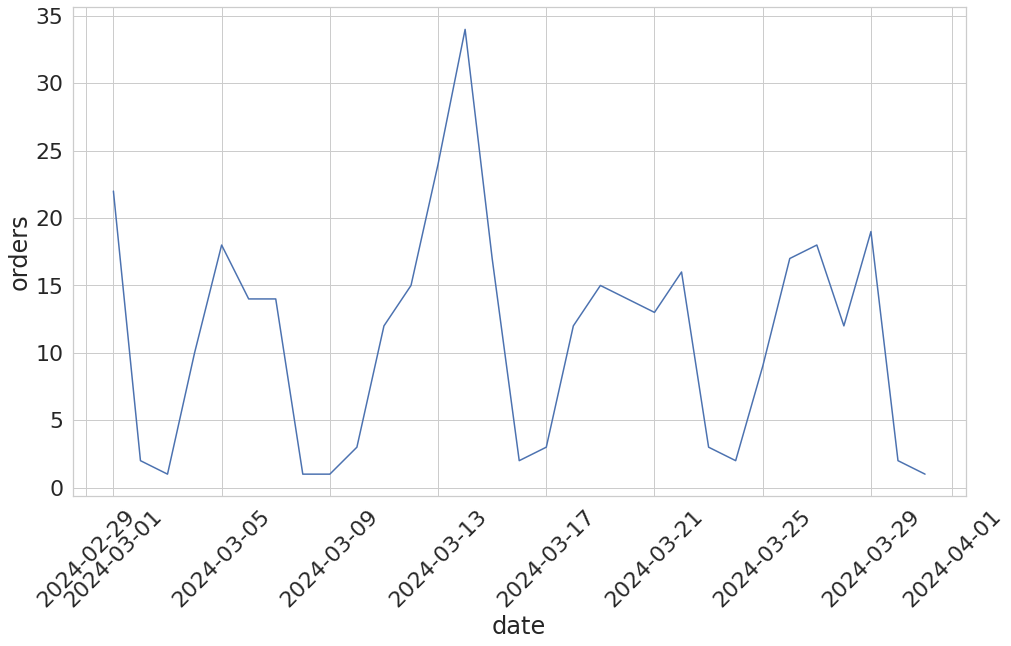

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(16, 9)})
sns.lineplot(data = df_order_names, x = 'date', y = 'orders')
plt.xticks(rotation = 45)

## Шаг 5

**Кажется, в данных помимо дня с наибольшим числом заказов есть еще один день, который выбивается из общей картины.** Что это за день:  
- Это воскресенье, в которое было много заказов?  
- Это понедельник, в который было много заказов?  
- Это пятница, в которую было мало заказов?  
- Это праздничный день, в который было мало заказов?

Подумайте, почему так вышло? Укажите этот день в том формате, в котором он представлен в данных (гггг-мм-дд)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Проверьте каждый из четырех предложенных поинтов: есть ли дни, соответствующие одному или нескольким поинтам? Посмотрите на график или на значения в датафрейме с количеством заказов по дням.
      
</p>
</details>

## Шаг 6

К вам пришел радостный руководитель отдела продаж и попросил выяснить причину, почему заказы в один из дней резко подскочили, чтобы и дальше увеличивать продажи.

Возможно, в день с наибольшим числом заказов (который вы определили на третьем шаге) отдел маркетинга запустил какую-то акцию? Или менеджеры стали активнее предлагать компаниям оформить заказ? Нужно подробнее изучить этот день. Начнем со статусов заказа.

**Добавьте к данным о заказах информацию об их статусах. Общий датафрейм назовите `orders_status`. Сохраните получившийся датафрейм в csv файл `orders_status.csv` (при сохранении используйте параметр `index=False`) и отправьте этот csv файл на проверку в LMS.**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Объедините датафреймы `df_orders` и `df_order_status` в новый `orders_status`.
      
2) Можете вывести первые строчки нового датафрейма и посмотреть его размер, чтобы убедиться, что объединение прошло корректно.
      
3) Сохраните датафрейм в csv файл с помощью метода, задав его название как строку `orders_status.csv` и параметр `index=False`.
      
4) Скачайте получившийся csv файл из той же папки в JupyterHub, где находится ноутбук, в котором вы пишете этот код. 
      
</p>
</details>

In [183]:
orders_status = df_orders.merge(df_order_status, on = 'order_id')
orders_status.shape

(4603, 7)

In [184]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


## Шаг 7

Посмотрите на количество и соотношение подтвержденных и отмененных заказов. **В ответе укажите долю отмененных заказов.** Ответ округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Чтобы оставить в данных только информацию о том, был заказ подтвержден или отменен, выберите из датафрейма `orders_status` колонки с номером заказа и статусом, а затем удалите дубликаты (НЕ сохраняйте результат в тот же датафрейм, потому что `orders_status` в полном виде понадобится для решения следующих заданий).

2) Посчитайте частоту, с которой встречается каждый из статусов в оставшихся данных.

3) Посчитайте долю каждого из статусов. Значения округлите до 2 знаков после точки.

      
</p>
</details>

In [185]:
orders_status[['order_id','status']].drop_duplicates().status.value_counts(normalize = True).round(2)


confirmed    0.89
canceled     0.11
Name: status, dtype: float64

## Шаг 8

**Посчитайте количество подтвержденных и отмененных заказов на каждую дату.** Определите, в какой день не было ни одного подтвержденного заказа. Для этого сделайте сводную таблицу, где в строках будут даты, в колонках — стутасы заказов, а значения — число заказов с этим статусом в определенную дату. Пропуски заполните нулями.  

**В ответ укажите день, когда не было ни одного подтвержденного заказа.** Дату укажите в том формате, в котором она представлена в данных (гггг-мм-дд).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Данные в датафрейме `orders_status` сгруппируйте по дате и статусу, посчитайте количество уникальных заказов для каждой группы. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Разверните получившийся датафрейм так, чтобы получилась сводная таблица, где в индексе — даты, в колонках — статусы, а в значениях — количество заказов. 
      
3) Пропуски заполните нулями.
      
4) Из-за того, что после разворота таблицы в колонках `canceled` и `confirmed` появились пропущенные значения, тип данных в этих колонках стал `float`. Но число заказов не может быть дробным, поэтому приведите эти колонки к типу `int`.
      
5) Отфильтруйте строки, где значение в колонке `confirmed` равно нулю.
      
</p>
</details>

In [186]:
orders_status_by_date = orders_status.groupby(['date','status'], as_index = False).agg({'order_id':'nunique'}).rename(columns = {'order_id':'orders'})
df_orders_pivot = orders_status_by_date.pivot(index = 'date', columns = 'status', values = 'orders').fillna(0)
df_orders_pivot[['canceled','confirmed']] = df_orders_pivot.astype({'confirmed': 'int', 'canceled': 'int'})
df_orders_pivot.query('confirmed == 0')

status,canceled,confirmed
date,,
2024-03-09,1,0


## Шаг 9

**Постройте график с заказами по дням в разбивке по статусу заказа.** Посмотрим подробнее на день с наибольшим числом заказов (вместе и подтвержденных, и отменных), который мы определили ранее, и на день, предшествующий ему. Какой вывод можно сделать? Выберите один или несколько вариантов:

- В день с наибольшим числом заказов было очень много отмен  
- В день с наибольшим числом заказов было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, было много отмен  
- В день, предшествующий дню с наибольшим числом заказов, было много успешно оформленных заказов  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного успешно оформленного заказа  
- В день, предшествующий дню с наибольшим числом заказов, не было ни одного отмененного заказа

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Постройте линейный график, где по оси `х` будут идти даты, по оси `у` — количество заказов, а цвета линий будут определены статусами заказов. Если метки с датами наползают друг на друга, поверните их под углом 45 градусов.

</p>
</details>

(array([738945., 738946., 738950., 738954., 738958., 738962., 738966.,
        738970., 738974., 738977.]),
 <a list of 10 Text major ticklabel objects>)

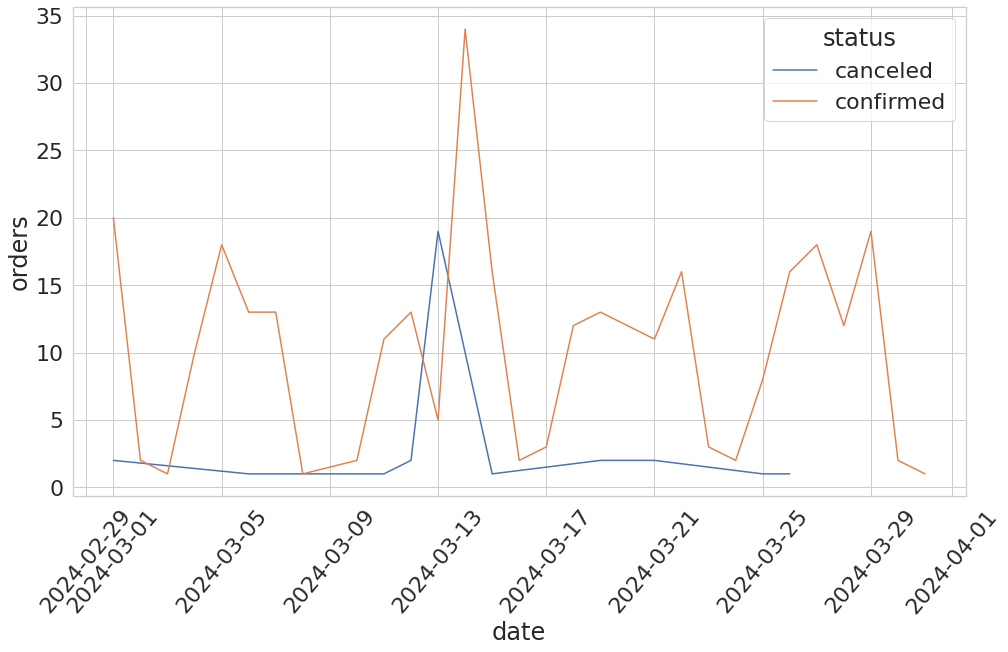

In [187]:
sns.lineplot(data = orders_status_by_date, x = 'date', y = 'orders', hue = 'status')
plt.xticks(rotation = 50)

## Шаг 10

Рассмотрим эти два дня отдельно (день с наибольшим числом заказов, который мы определили ранее, и день, предшествующий ему). Проанализируйте заказы за эти дни и ответьте, какую из этих гипотез можно назвать наиболее правдоподобной.

- Так сложилось, что один день оказался крайне неудачным для отдела продаж, все клиенты отменили свои заказы. А на следующий день отдел продаж пытался компенсировать отсутствие продаж в предыдущий и перевыполнил дневной план. Почти все заказы не повторяют вчерашние  
- Произошел сбой в работе CRM системы, который не позволил клиентам подтвердить заказ. В результате все созданные в первый день заказы автоматически отменились, поэтому клиентам пришлось оформлять их повторно на следующий день. Почти половина заказов повторяет вчерашние

Как можно определить, что заказ повторяет вчерашний? У заказов будут совпадать сразу несколько параметров: клиент, менеджер, количество уникальных товаров в заказе и общее число товаров в штуках. Но номера заказов будут разными.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите все отмененные заказы 13 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
2) Отберите все подтвержденные заказы 14 марта и для каждого заказа агрегируйте данные: посчитайте количество уникальных товаров в нем, сумму единиц всех товаров, а также возьмите менеджера и клиента (примените к соответствующим колонкам функции `max`).
      
3) Объедините эти датафреймы с заказами по совпадающим характеристикам: имя менеджера, id клиента, число уникальных товаров в заказе и общее число товаров в штуках. Так у вас получатся те заказы, которые отменили в первый день и оформили заново на следующий.
      
4) Посчитайте число строк в датафрейме с заказами, которые отменили в первый день и оформили заново на следующий. Разделите это число на число строк в датафрейме с подтвержденными заказами 14 марта. Так вы узнаете долю заказов, которые повторяют вчерашние.
      
</p>
</details>

In [188]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [189]:
df_canc_march13 = orders_status.loc[(orders_status['date'] == '2024-03-13') & (orders_status['status'] == 'canceled')]\
    .groupby(['order_id'],as_index = False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})
    
df_canc_march13

,order_id,product_id,manager,client_id,quantity
0,AFIH-00611801,11,Алексей Саксофонов,43,192
1,BBFJ-27674101,14,Ксения Балалайкина,73,294
2,CLBQ-63032648,13,Виктор Тромбонов,60,205
3,CYJY-07359557,13,Екатерина Тарелкина,56,316
4,GHGB-88045656,4,Ксения Балалайкина,7,42
5,JEIF-69283221,15,Виктор Тромбонов,94,207
6,JQQO-28609300,15,Виктор Тромбонов,93,252
7,KJJS-03491897,18,Алексей Саксофонов,66,399
8,MIGZ-68487439,17,Алексей Саксофонов,51,325
9,NBIO-35476164,14,Виктор Тромбонов,95,319


In [190]:
df_conf_march14 = orders_status.loc[(orders_status['date'] == '2024-03-14') & (orders_status['status'] == 'confirmed')]\
    .groupby(['order_id'],as_index = False) \
    .aggregate({'product_id': 'nunique', 'manager': 'max', 'client_id': 'max', 'quantity':'sum'})
    
df_conf_march14.shape

(34, 5)

In [191]:
df_march = pd.merge(df_canc_march13 ,df_conf_march14, on = ['manager','product_id', 'quantity', 'client_id'])

In [192]:
df_march.shape[0] / df_conf_march14.shape[0]

0.47058823529411764

### Посчитаем ключевые метрики, посмотрим на их динамику и составим небольшой отчет

## Шаг 11

**У вас есть данные за целый месяц, поэтому пора посчитать ключевые метрики этого месяца.** Но вот незадача - в ваших данных цена единицы товара указана в долларах США, потому что закупаете их в долларах, но продаете товары за российские рубли (по тому курсу, который установил Центробанк на дату продажи), а значит и метрики требуется посчитать в рублях. Хорошо, что у вас есть текстовый файл с курсом доллара США на каждую дату. **Откройте файл `usd_rate.txt`, соберите из него датафрейм с 2 колонками: `date` и `currency_rate`. Посчитайте среднее значение курса доллара за месяц.** Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Откройте файл `usd_rate.txt` с помощью контекстного менеджера `with` и функции `open()`. Список строк сохраните в переменную `currency`.
      
2) С помощью функции `pd.DataFrame(columns=['col_name'])` создайте из списка датафрейм с любым названием единственной колонки.
      
3) На основе имеющейся колонки создайте колонки `date` и `currency_rate`, куда положите соответствующие данные. Для этого разделите общую строку со всеми данными и возьмите нужные данные по индексу.
      
4) Переведите колонку `date` в тип `datetime`.
      
5) Удалите из датафрейма ненужную колонку с общими данными.
      
6) Посчитайте среднее значение курса доллара за месяц.
      
7) Результат округлите до двух знаков после точки.   
      
</p>
</details>

In [193]:
currency = []

with open ('usd_rate.txt') as f:
    for line in f:
        currency.append(line)
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [194]:
df_currency = pd.DataFrame(currency,columns = ['course'])


In [195]:
df_currency['date'] = df_currency['course'].apply(lambda x: x.split(',')[0])
df_currency['currency_rate'] = df_currency['course'].apply(lambda x: float(x.split(',')[1]))

In [197]:
df_currency['date'] = pd.to_datetime(df_currency['date'])
df_currency = df_currency.drop(columns = 'course')
df_currency

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [199]:
df_currency.currency_rate.mean().round(2)

91.7

## Шаг 12

**Работу с ключевыми метриками начните с подсчета общей выручки.** Данные по товарам в подтвержденных заказах у вас есть в датафрейме `orders_status`, а стоимость одной единицы товара можно взять из датафрейма `df_products`. Объедините эти датафреймы в общий `df_full`, добавьте к ним информацию по курсу доллара на каждую дату. Создайте колонку с выручкой для каждого товара в заказах и посчитайте, **чему равна общая выручка в рублях?** Учитывайте только подтвержденные заказы. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Присоедините к датафрейму `orders_status` датафрейм `df_products`, указав, что ключом в левом датафрейме будет являться колонка `product_id` (параметр `left_on`), а в правом — колонка `id` (параметр `right_on`). Новый датафрейм сохраните в `df_full`.
      
2) К датафрейму `df_full` добавьте информацию о курсе доллара на каждую дату, присоединив датафрейм `df_currency` по общей колонке с датой.
      
3) Создайте колонку `price_rub` с ценами в рублях. Для этого умножьте значения в колонке `price` с ценами на значения в колонке `currency_rate` с курсом валюты.
      
4) Создайте колонку `revenue` с выручкой, умножив колонку со стоимостью единицы товара в рублях на колонку с количеством товара.
      
5) Отберите только записи с подтвержденными заказами и сохраните результат в датафрейм `df_confirmed`, он вам ещё пригодится.
      
6) Суммируйте значения в колонке `revenue` и округлите результат до двух знаков после точки.
      
</p>
</details>

In [200]:
df_full = orders_status.merge(df_products, left_on = 'product_id', right_on ='id')



In [202]:
df_full = df_full.merge(df_currency, on ='date')
df_full

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493
...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336


In [203]:
df_full['price_rub'] = df_full['price'] * df_full['currency_rate']


In [204]:
df_full['revenue'] = df_full['price_rub'] * df_full['quantity']

In [205]:
df_confirmed = df_full[df_full['status'] == 'confirmed']


In [206]:
df_confirmed['revenue'].sum() / df_confirmed['order_id'].nunique()


6596219.487264932

## Шаг 13

**Следующая метрика, которую вам нужно посчитать — средний чек в этом месяце (в рублях).** Разделите общую выручку на количество заказов. Результат округлите до двух знаков после точки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Посчитайте число уникальных подтвержденных заказов.

2) Разделите сумму выручки, посчитанную на прошлом шаге (без округления), на это число.

3) Результат округлите до двух знаков после точки.  
      
</p>
</details>

## Шаг 14

Ключевые метрики месяца вы посчитали, теперь попробуйте посмотреть на их динамику внутри месяца: посчитайте выручку, средний чек и число заказов — на каждый день. Посмотрите на графики и выберите верные ответы:

- число заказов и выручка каждый день изменяются в одинаковом направлении (если в этот день число заказов выросло, то и выручка выросла; число заказов упало — в этот же день упала и выручка)  
- число заказов и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день число заказов выросло, то выручка может упасть, и наоборот: число заказов упало — в этот же день выручка выросла)  
- средний чек и выручка каждый день изменяются в одинаковом направлении (если в этот день средний чек вырос, то и выручка выросла; средний чек упал — в этот же день упала и выручка)  
- средний чек и выручка не каждый день изменяются в одинаковом направлении (если в какой-то день средний чек вырос, то выручка может упасть, и наоборот: средний чек упал — в этот же день выручка выросла)  
- в день с наибольшим числом заказов и выручка, и средний чек также показывают максимальное значение  
- в день с наибольшим числом заказов выручка и/или средний чек не показывают максимальное значение  
- с течением времени выручка то увеличивается, то уменьшается  
- с течением времени выручка только увеличивается  
- на протяжении всего месяца средний чек то увеличивается, то уменьшается  
- средний чек на протяжении всего месяца имеет одинаковое значение

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сгруппируйте датафрейм `df_confirmed` с подтвержденными заказами по дате и посчитайте на каждую дату число ункальных заказов и выручку. Результат сохраните в датафрейм `df_report_by_date`. Получившуюся колонку с числом заказов можете переименовать в `orders`. 
      
2) Создайте колонку со значением среднего чека в каждую дату, для этого разделите значения в колонке с выручкой на значения в колонке с числом заказов. Результат округлите до двух знаков после точки
      
3) Постройте три линейных графика, один под другим (в одной ячейке или в разных)
      
</p>
</details>

In [207]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864,7.945110e+04


In [212]:
df_report_by_date = df_confirmed.groupby(['date'], as_index=False).aggregate({'order_id': 'nunique', 'revenue': 'sum'}).rename(columns={'order_id':'orders'})
df_report_by_date['avg_check'] = (df_report_by_date['revenue']/df_report_by_date['orders']).round(2)
df_report_by_date

,date,orders,revenue,avg_check
0,2024-03-01,20,1.554118e+08,7770587.80
1,2024-03-02,2,1.197167e+07,5985834.26
2,2024-03-03,1,2.548418e+06,2548418.42
3,2024-03-04,10,6.404993e+07,6404992.56
4,2024-03-05,18,8.952724e+07,4973735.46
5,2024-03-06,13,1.107687e+08,8520669.46
6,2024-03-07,13,9.102331e+07,7001792.83
7,2024-03-08,1,1.609147e+06,1609146.62
8,2024-03-10,2,8.929309e+06,4464654.57
9,2024-03-11,11,8.910847e+07,8100769.59


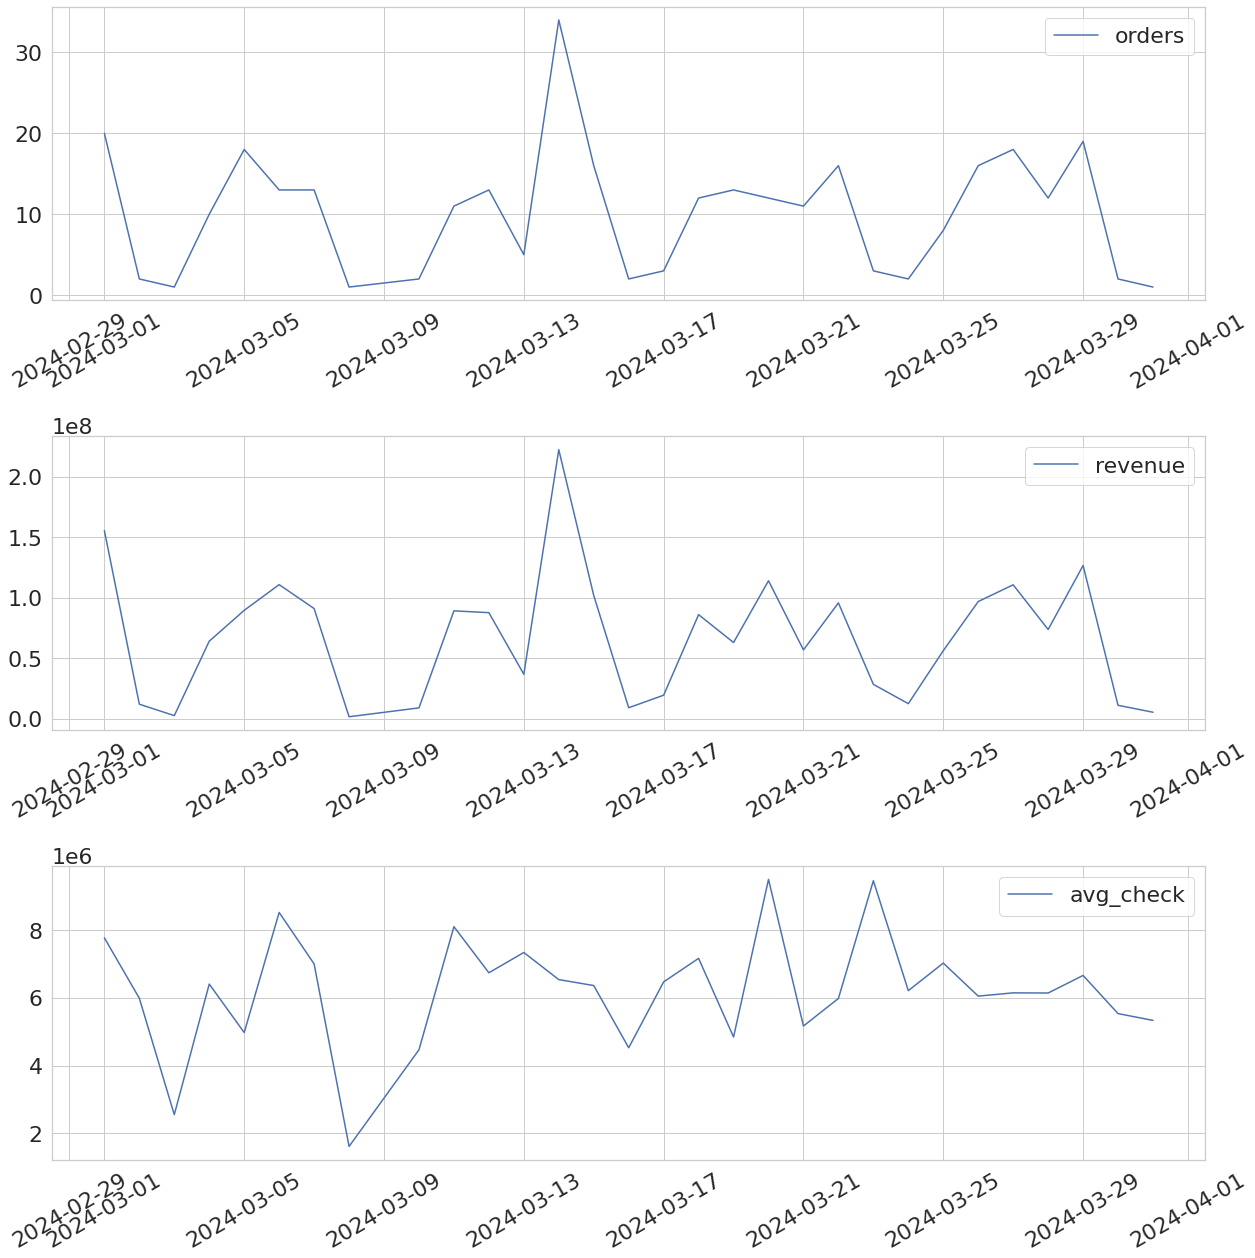

In [214]:
metrics = ['orders', 'revenue', 'avg_check']

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

for i, metric in enumerate(metrics):
    df = df_report_by_date[['date', metric]].set_index('date')
    sns.lineplot(data=df, ax=axes[i]);
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel('')

plt.tight_layout();

### Проанализируем интерес клиентов к брендам

## Шаг 15

К вам снова обратился руководитель отдела продаж. Он хочет разобраться, какие бренды востребованы среди клиентов, а какие — нет. На основе данных о названиях товаров в датафрейме `df_full` создайте новую колонку `brand`, где будет только название бренда. **Посчитайте, сколькими брендами интересовались клиенты** (статус заказа здесь не важен, если запись о бренде попала в данные о заказах, значит клиент заказал или хотел заказать товар этого бренда).

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) В датафрейме `df_full` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке name и возьмите первое из них (сначала идет бренд и через запятую модель товара).

2) Посчитайте количество уникальных значений в колонке `brand`.
      
</p>
</details>

In [217]:
df_full['brand'] = df_full['name'].str.split(',').apply(lambda x: x[0])
df_full['brand'].nunique()


121

## Шаг 16

Посчитайте, какую выручку принес каждый бренд и в скольких подтвержденных заказах были товары этого бренда. **Определите, какой бренд принес наибольшую выручку.** В ответ укажите его название.

Дополнительно: проверьте, именно этот бренд встречается в большем количестве заказов, чем другие бренды? Или может его реже заказывают, но на более крупные суммы?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Отберите в датафрейме `df_full` только подтвержденные заказы.

2) Сгруппируйте данные по брендам и посчитайте выручку и количество уникальных заказов.

3) Отсортируйте агрегированные данные по убыванию выручки и посмотрите бренд в верхней строчке.

4) Дополнительно: отсортируйте агрегированные данные по убыванию количество заказов и посмотрите бренд в верхней строчке.

</p>
</details>

In [224]:
df_brands = df_full.query("status == 'confirmed'").groupby(['brand'],as_index=False).agg({'revenue':'sum', 'order_id':'nunique'}).sort_values('revenue', ascending=False).rename(columns = {'order_id': 'orders'})

In [226]:
df_brands.sort_values(['orders'],ascending = False).head(1)

,brand,revenue,orders
46,JBL,2.665961e+08,264


## Шаг 17

У одних брендов большинство товаров востребовано клиентами, а у других — клиенты заказывают только небольшую часть товаров, а остальные зря занимают виртуальную «полку» в перечне товаров, продаваемых вашей компанией. **Вам нужно определить, какие бренды редко попадают в заказы, хотя товаров таких брендов на самом деле много.**

Начнем с того, что определим, какие товары из имеющихся в продаже хоть раз заказывали, а какие — нет. Для этого соберите список из перечня уникальных идентификаторов товаров, которые встречаются в датафрейме `df_confirmed`. После этого для каждого товара в датафрейме `df_products` определите, был ли этот товар в списке заказанных товаров в этом месяце или нет: создайте новую колонку `is_in_orders` и заполните её соответственно значениями `yes` или `no` для каждого товара.

**В ответе укажите, сколько товаров были заказаны, а сколько — не были**

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
1) Сохраните в список `products_in_orders` уникальные идентификаторы товаров из датафрейма `df_confirmed`.
      
2) Создайте в датафрейме `df_products` новую колонку `is_in_orders`, в которой будет значение `yes`, если значение из колонки `id` этого датафрейма есть в списке `products_in_orders`. Если его в этом списке нет - в новую колонку для этой строчки запишите значение `no`.
      
3) Посчитайте количество встречающихся значений `yes` и  `no` в колонке `is_in_orders`.
      
</p>
</details>

In [229]:
products_in_orders = df_confirmed['product_id'].unique()
df_products['is_in_orders'] = df_products['id'].apply(lambda x: 'yes' if x in products_in_orders else 'no')

df_products

,id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,yes
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,yes
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,yes
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,yes
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,yes


In [251]:
df_products.is_in_orders.value_counts()

yes    1180
no      497
Name: is_in_orders, dtype: int64

## Шаг 18

Примерно треть товаров не была заказана ни разу в этом месяце. Посмотрим на эти данные в разрезе по брендам. **Определите, у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда.** Но не берите в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

Отметьте бренды, у которых доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда: 
- AKG  
- ASUS	
- Dali  
- Emotiva  
- KEF  
- Marantz  
- Onkyo  
- Pioneer  
- Yaqin

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) В датафрейме `df_products` создайте новую колонку `brand`, в которую поместите только названия брендов. Для этого разделите значения в колонке `name` и возьмите первое из них (сначала идет бренд и через запятую модель товара).
      
2) Сгруппируйте данные по бренду и колонке, в которой указано, есть товар в заказах, и посчитайте число уникальных товаров. Колонку с числом товаров можете переименовать в `products`.
      
3) Разверните сгруппированные данные так, чтобы получилась сводная таблица в которой в индексе названия брендов, в колонках - есть товар в заказах или нет (`yes` и `no`), в значениях - количество товаров.
      
4) Заполните пропуски нулями.
      
5) Сбросьте индекс, чтобы названия брендов стали колонкой.
      
6) Посчитайте общее число товаров для каждого бренда, сложив значения в колонках `yes` и `no`.
      
7) Для каждого бренда посчитайте долю ни разу не заказанных товаров от всех продаваемых товаров этого бренда.
      
8) Отберите только те бренды, где общее число товаров больше 15 и доля ни разу не заказанных товаров больше половины (0.5).
      
</p>
</details>

In [252]:
df_products['brands'] = df_products['name'].str.split(',').apply(lambda x: x[0]) 
brands_no_orders = df_products.groupby(['brands','is_in_orders'],as_index = False)\
                                .agg({'id':'nunique'})\
                                .rename(columns = {'id':'products'})
brands_no_orders

,brands,is_in_orders,products
0,AKG,no,6
1,AKG,yes,5
2,ART,yes,1
3,ASUS,no,1
4,ASUS,yes,2
...,...,...,...
208,Xiaomi,yes,4
209,YAQIN,no,1
210,Yamaha,no,15
211,Yamaha,yes,91


In [253]:
brands_pivot = brands_no_orders.pivot(index='brands',columns = 'is_in_orders', values = 'products').fillna(0).reset_index()
brands_pivot

is_in_orders,brands,no,yes
0,AKG,6.0,5.0
1,ART,0.0,1.0
2,ASUS,1.0,2.0
3,Adam Audio,1.0,0.0
4,Amazon,0.0,4.0
...,...,...,...
141,Wharfedale,7.0,50.0
142,Xiaomi,0.0,4.0
143,YAQIN,1.0,0.0
144,Yamaha,15.0,91.0


In [254]:
brands_pivot['total'] = brands_pivot['no'] + brands_pivot['yes']

In [255]:
brands_pivot['no_orders'] = brands_pivot['no']/brands_pivot['total']

In [256]:
brands_pivot.


SyntaxError: invalid syntax (<ipython-input-256-ef19073c4468>, line 1)

In [257]:
brands_pivot.query('total > 15 and no_orders > 0.5').brands.to_list()

['Dali', 'KEF', 'Marantz', 'Pioneer']

In [258]:
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,id,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,489,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,2.902290e+05
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed,594,"JBL, Control 28-1",301.85,Настенная акустика,90.7493,27392.676205,1.643561e+05
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed,670,"KEF, LSX Wireless",810.17,Беспроводная акустика,90.7493,73522.360381,1.176358e+06
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed,469,"Heco, Studio Pro 10",82.34,Конденсаторный микрофон,90.7493,7472.297362,6.725068e+04
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed,1302,"Rode, NT1-A",191.86,Конденсаторный микрофон,90.7493,17411.160698,8.705580e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,YHMP-64962628,564,40,Маргарита Камертонова,2024-03-03,44,confirmed,564,"JBL, Tune 510BT",45.38,Беспроводные наушники,91.3336,4144.718768,1.657888e+05
4599,YHMP-64962628,486,17,Маргарита Камертонова,2024-03-03,44,confirmed,486,"Heco, Ambient 22F",185.50,Настенная акустика,91.3336,16942.382800,2.880205e+05
4600,YHMP-64962628,832,28,Маргарита Камертонова,2024-03-03,44,confirmed,832,"LG, SK1",86.56,Саундбар,91.3336,7905.836416,2.213634e+05
4601,YHMP-64962628,254,10,Маргарита Камертонова,2024-03-03,44,confirmed,254,"Edifier, R1280T",86.99,Активные колонки,91.3336,7945.109864,7.945110e+04


### Составим отчет по продажам менеджеров

## Шаг 19

Чтобы компания знала, кого из менеджеров отдела продаж премировать, а с кем провести беседу по итогам месяца, **вас попросили сделать отчет по сделкам каждого менеджера**: сколько он оформил подтвержденных заказов и какую выручку они принесли. Но в абсолютных числах вклад каждого сотрудника может быть непонятен. **Поэтому посчитайте значения в процентах: какой % выручки от общей выручки за месяц приходится на каждого менеджера, и какой % заказов от общего числа заказов.** Посчитайте данные и визуализируйте результат, чтобы принимать решение о поощрении или проведении беседы с менеджерами было удобнее. Выберите верные ответы:

- лучшим менеджером по % выручки стала Маргарита Камертонова  
- лучшим менеджером по % заказов стала Маргарита Камертонова  
- первая пятерка менеджеров по % выручки сильно ушла вперед от всех остальных (явно виден большой разрыв между каждым из первой пятерки и каждым из всех остальных менеджеров)  
- в этом месяце нельзя выделить явную пятерку лидеров по % выручки, которые сильно оторвались от остальных  
- лидер по % заказов реализовал более 16% заказов  
- лидер по % заказов реализовал менее 16% заказов  
- наихудшие показатели у Сергея Контрабасова  
- наихудшие показатели у Аркадия Октавина  
- Антон Скрипкин принес в 3 раза меньше выручки, чем Виктор Тромбонов  
- Антон Скрипкин реализовал почти в 3 раза меньше заказов, чем Анастасия Дудкина

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
       
1) Сгруппируйте данные с подтвержденными заказами из датафрейма `df_confirmed` по менеджерам и посчитайте для каждого сумму выручки и количество заказов. Получившуюся колонку с числом заказов можете переименовать в `orders`.
      
2) Отсортируйте записи по убыванию выручки.
      
3) Посчитайте процент выручки, приходящейся на каждого менеджера: разделите его выручку на суммарную выручку всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.
      
4) Посчитайте процент заказов, приходящихся на каждого менеджера: разделите его число заказов на суммарное число заказов всех менеджеров и умножьте результат на 100. Округлите до двух знаков после точки.   
      
5) Постройте два барплота (столбиковые диаграммы): со значениями % выручки и % заказов у каждого менеджера.
      
</p>
</details>

In [263]:
df_managers = df_confirmed.groupby(['manager'],as_index = False).agg({'revenue':'sum', 'order_id':'nunique'}).rename(columns = {'order_id': 'orders'})

In [264]:
df_managers.revenue.sort_values(ascending = False)

9     3.473886e+08
4     3.188999e+08
8     2.401478e+08
5     2.084865e+08
0     1.953435e+08
7     1.817621e+08
6     1.781576e+08
10    1.347836e+08
1     1.234504e+08
2     5.150268e+07
3     2.973678e+07
11    2.857223e+07
Name: revenue, dtype: float64

In [265]:
df_managers['%revenue'] = round(df_managers['revenue'] / df_managers['revenue'].sum() * 100, 2)
df_managers['%orders'] = round(df_managers['orders'] / df_managers['orders'].sum() * 100, 2)
df_managers

,manager,revenue,orders,%revenue,%orders
0,Алексей Саксофонов,1.953435e+08,27,9.58,8.74
1,Анастасия Дудкина,1.234504e+08,20,6.06,6.47
2,Антон Скрипкин,5.150268e+07,7,2.53,2.27
3,Аркадий Октавин,2.973678e+07,5,1.46,1.62
4,Виктор Тромбонов,3.188999e+08,50,15.65,16.18
5,Владимир Ударников,2.084865e+08,31,10.23,10.03
6,Екатерина Тарелкина,1.781576e+08,28,8.74,9.06
7,Ксения Балалайкина,1.817621e+08,27,8.92,8.74
8,Максим Барабанов,2.401478e+08,40,11.78,12.94
9,Маргарита Камертонова,3.473886e+08,48,17.04,15.53


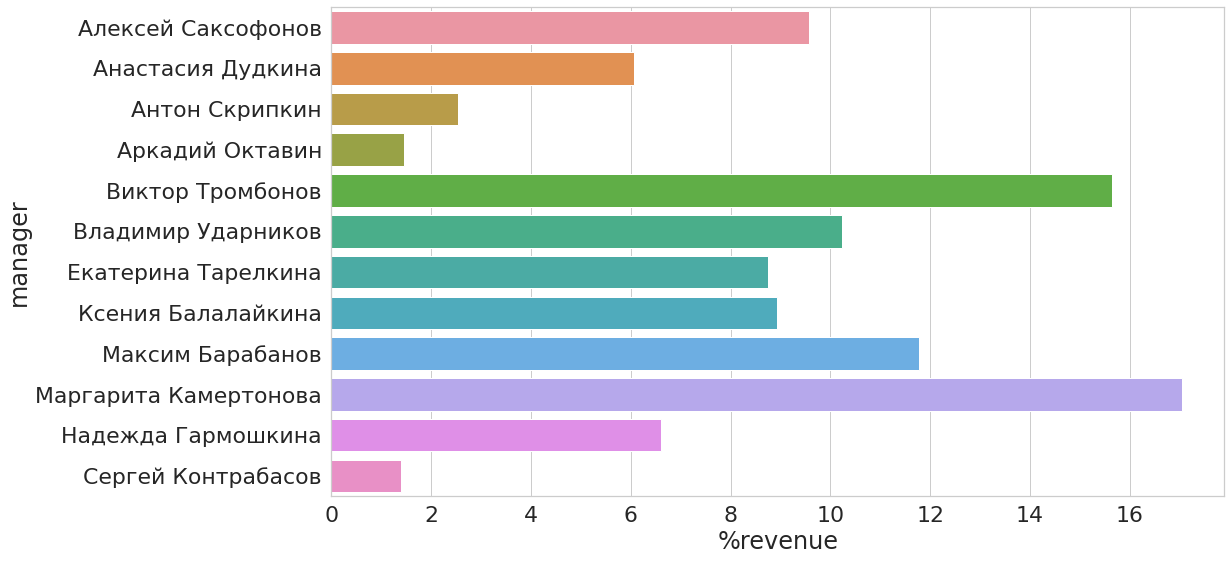

In [267]:
sns.barplot(data = df_managers, x = '%revenue', y = 'manager')

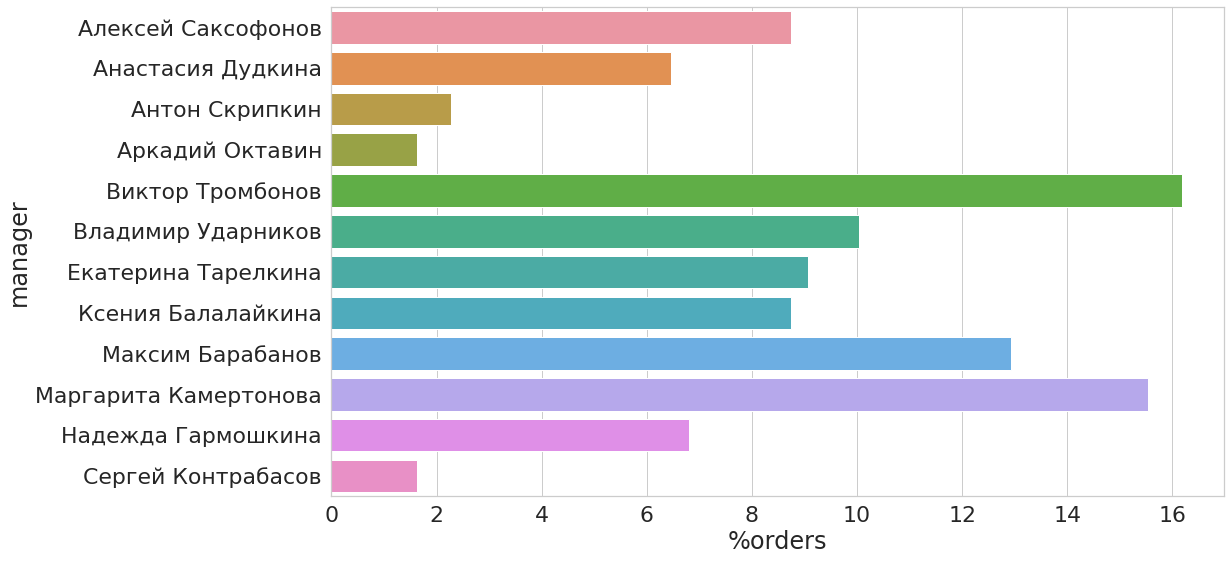

In [268]:
sns.barplot(data = df_managers, x = '%orders', y = 'manager')

## Итоги

В финальном проекте модуля Python вы проанализировали продажи музыкальных товаров: собрали данные, посчитали ключевые метрики в динамике; определили дни, которые выбиваются из общей картины, и выяснили причину этого; нашли наиболее прибыльные бренды и те, которые зря занимают место на виртуальной «полке». Вы проделали отличную работу!

Но если считаете, что можете больше, продолжайте анализ имеющихся данных самостоятельно. Например, посмотрите, в какие дни недели оформляется в среднем больше заказов; составьте более полный отчет по продажам каждого менеджера (учтите отмененные заказы); определите наиболее и наименее популярные/прибыльные категории товаров и т.п. Данные полны инсайтов! Но эти задания не оцениваются и по ним не осуществляется поддержка экспертов. Зато вы можете сделать эту работу своим пет-проектом :)